In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# METHOD 1 (Loop through a list)

# PARAMETERS

alpha = 1 - 0.43
beta = 0.95**30 # literature: 0.99, 0.98, 0.95 (quarterly)
n = 1.05
phi = (98.48 + 46.74)/(2*60*(24-8))
gamma = n*phi*(1+beta)/(1-n*phi)

# INITIAL VALUES
A = 1
K = 1
L = 1000
N = L/(1-phi*n)
k0 = K/L

### LISTS TO STORE OUTPUT

T_out = [0]
L_out = [L]
N_out = [N]
K_out = [K]
k_out = [k0]

### LOOP SIMUL
for i in range(20):
    k1 = beta*(1-alpha)/(1+beta) * A * (k0**alpha)
    N1 = n * N 
    L1 = N1 * (1 - phi*n)
    K1 = (k1/A)*L1
    # add back to lists
    T_out.append(i+1)
    L_out.append(L1)
    N_out.append(N1)
    K_out.append(K1)
    k_out.append(k1)
    # update next value
    k0 = k1
    N = N1 
    L = L1
    K = K1



In [64]:
# METHOD 2 (Array updating)

iter = 20
k = np.zeros(iter)
t = np.zeros(iter)
l = np.zeros(iter)
pop = np.zeros(iter) 

# INITIAL VALUES
A = 1
K = 1
L = 1000
N = L/(1-phi*n)
k0 = K/L

k[0] = k0 
t[0] = 0
l[0] = L
pop[0] = N

# loop
for i in np.arange(1,iter):
    k[i] = beta*(1-alpha)/(1+beta) * A * (k[i-1]**alpha)
    pop[i] = pop[i-1]*n
    l[i] = pop[i]*(1-phi*n)

#print(f'{k} \n {l} \n {pop}')

In [66]:
# Using Functions
def cal_k(k):
    return beta*(1-alpha)/(1+beta) * A * (k**alpha)

def cal_pop(population):
    return population * n 

def cal_labor(population):
    return population * (1-phi*n)

# METHOD 2
iter = 20
k = np.zeros(iter)
t = np.zeros(iter)
l = np.zeros(iter)
pop = np.zeros(iter)

# INITIAL VALUES
A = 1
K = 1
L = 1000
N = L/(1-phi*n)
k0 = K/L

k[0] = k0 
t[0] = 0
l[0] = L
pop[0] = N

# loop
for i in np.arange(1,iter):
    k[i] = cal_k(k[i-1])
    pop[i] = cal_pop(pop[i-1])
    l[i] = cal_labor(pop[i])

#print(f'{k} \n {l} \n {pop}')

In [67]:
# Using Class

class Model():
    def __init__(self, alpha, beta, phi, n, k0, iter):
        # PARAMS
        self.iter = iter
        self.alpha = alpha
        self.beta = beta
        self.phi = phi 
        self.n = n*phi*(1+beta)/(1-n*phi)
        self.gamma = gamma
        # initiate values
        self.k = np.zeros(self.iter)
        self.t = np.zeros(self.iter)
    
    # INITIAL VALUES
    k0 = 0.1

    def run_simul(self):
        self.k[0] = k0 
        self.t[0] = 0
        for i in np.arange(1,self.iter):
            self.t[i] = i
            self.k[i] = self.beta*(1-self.alpha)/(1+self.beta) * (self.k[i-1]**self.alpha)
        return self.k


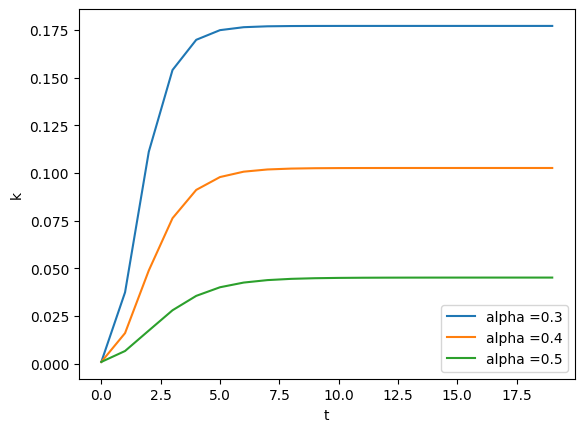

In [70]:
# TESTING: How alpha affects the model

model1 = Model(0.3, 0.99**30, 0.07, 1.05, 0.01, 20)
model2 = Model(0.4, 0.99**30, 0.07, 1.05, 0.01, 20)
model3 = Model(0.5, 0.99**30, 0.07, 1.05, 0.01, 20)

# run simulations
model1.run_simul()
model2.run_simul()
model3.run_simul()

# plot
plt.plot(model1.t, model1.k, label=f'alpha ={model1.alpha}')
plt.plot(model2.t, model2.k, label=f'alpha ={model2.alpha}')
plt.plot(model3.t, model3.k, label=f'alpha ={model3.alpha}')
plt.xlabel('t')
plt.ylabel('k')
plt.legend()